In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
folder = 'time_logs/'
approaches = ['Sellan et al. (2022)', 'OpenVDV', 'Ours']
file = ['sellan', 'openvdb', 'ours']
memory_unit = ['B', 'MB', 'MB']
uses_gpu = [False, True, True]
extension = '.txt'

In [4]:
# Change matplotlib style
plt.style.use('default')

font_mapping = {'family': 'Adobe Devanagari', 'weight': 'normal', 'size': 11}
plt.rc('font', **font_mapping)

In [5]:
class Event:
    def __init__(self, time, event_type):
        self.time = time
        self.event_type = event_type
        
        # make label pretty
        self.event_type = self.event_type.replace('_', ' ')
        
        # Preserve initial uppercase and lower the rest
        self.event_type = self.event_type[0].upper() + self.event_type[1:].lower()
        
class ResourceUsage:
    def __init__(self, cpu, cpu_total, memory, memory_total, gpu=.0, gpu_total=.0, memory_unit='MB'):
        self.cpu = cpu
        self.cpu_total = cpu_total
        self.memory = memory
        self.memory_total = memory_total
        self.gpu = gpu
        self.gpu_total = gpu_total
        
        divisor = 1
        if memory_unit == 'GB':
            divisor = 1024
        elif memory_unit == 'MB':
            divisor = 1024 ** 1
        elif memory_unit == 'KB':
            divisor = 1024 ** 2
        elif memory_unit == 'B':
            divisor = 1024 ** 3
            
        self.memory /= divisor
        self.memory_total /= divisor
        
        print(self.memory, self.memory_total, divisor)

In [6]:
events = []
resource_usage = []

for i in tqdm(range(len(approaches))):
    file_name = folder + file[i] + extension
    print(file_name)
    
    with open(file_name, 'r') as f:
        lines = f.readlines()
        events.append([])
        resource_usage.append([])
        
        for line in lines:
            if 'EventType.' in line:
                time = float(line.split(' ')[1])
                event_type = line.split(' ')[0]
                event_type = event_type.split('.')[1]
                events[i].append(Event(time, event_type))
            else:
                resources = line.split(' ')
                if len(resources) == 3:
                    cpu = float(resources[0])
                    memory = float(resources[1])
                    memory_total = float(resources[2])
                    memory *= memory_total / 100
                    resource_usage[i].append(ResourceUsage(cpu, 100.0, memory, memory_total, memory_unit=memory_unit[i]))
    break

  0%|          | 0/3 [00:00<?, ?it/s]

time_logs/sellan.txt
50.05043746948242 175.61557006835938 1073741824
50.05043746948242 175.61557006835938 1073741824
49.17235961914062 175.61557006835938 1073741824
49.17235961914062 175.61557006835938 1073741824
49.17235961914062 175.61557006835938 1073741824
49.17235961914062 175.61557006835938 1073741824
49.69920632934571 175.61557006835938 1073741824
49.87482189941406 175.61557006835938 1073741824
50.05043746948242 175.61557006835938 1073741824
50.401668609619136 175.61557006835938 1073741824
50.401668609619136 175.61557006835938 1073741824
50.401668609619136 175.61557006835938 1073741824
50.401668609619136 175.61557006835938 1073741824
50.401668609619136 175.61557006835938 1073741824
50.401668609619136 175.61557006835938 1073741824
50.401668609619136 175.61557006835938 1073741824
50.401668609619136 175.61557006835938 1073741824
50.5772841796875 175.61557006835938 1073741824
50.5772841796875 175.61557006835938 1073741824
50.5772841796875 175.61557006835938 1073741824
50.57728417968

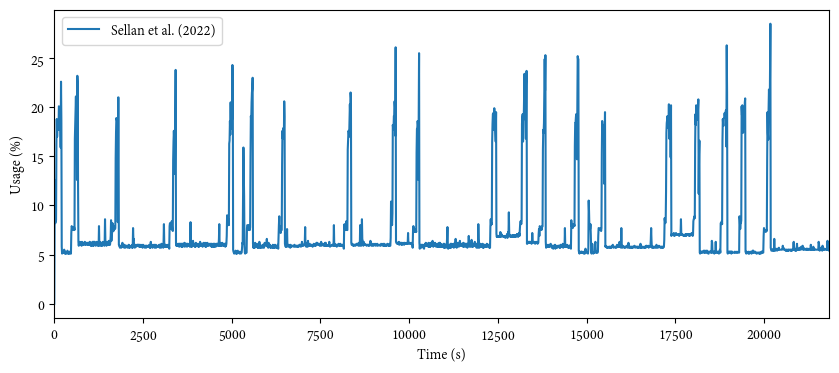

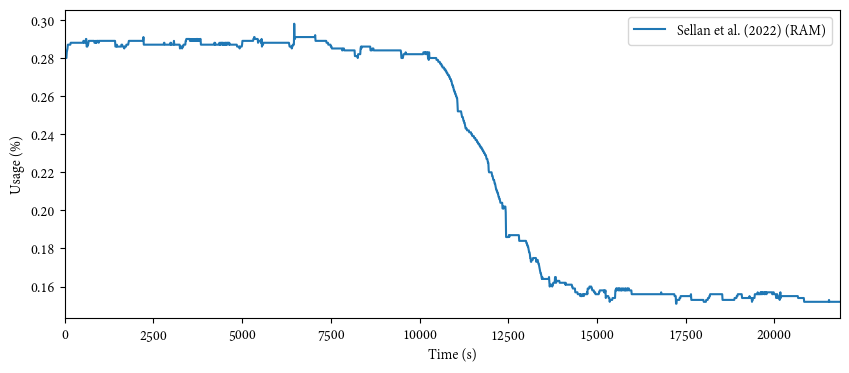

In [7]:
# CPU usage
plt.figure(figsize=(10, 4))
for i in range(len(approaches)):
    x_axis = [i * 10 for i in range(len(resource_usage[i]))]
    plt.plot(x_axis, [resource.cpu for resource in resource_usage[i]], label=approaches[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Usage (%)')
    plt.xlim(0, np.amax(x_axis))
    plt.legend()
    plt.show()
    
    break
    
# Memory usage
plt.figure(figsize=(10, 4))
for i in range(len(approaches)):
    x_axis = [i * 10 for i in range(len(resource_usage[i]))]
    plt.plot(x_axis, [resource.memory / resource.memory_total for resource in resource_usage[i]], label=approaches[i] + ' (RAM)')
    if uses_gpu[i]:
        plt.plot(x_axis, [resource.gpu / resource.gpu_total for resource in resource_usage[i]], label=approaches[i] + ' (VRAM)')  
    plt.xlabel('Time (s)')
    plt.ylabel('Usage (%)')
    plt.xlim(0, np.amax(x_axis))
    plt.legend()
    plt.show()
    
    break

C:\Users\allopezr\AppData\Local\Temp\4\ipykernel_43460\3022681114.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(accumulated_time.keys(), rotation=45)


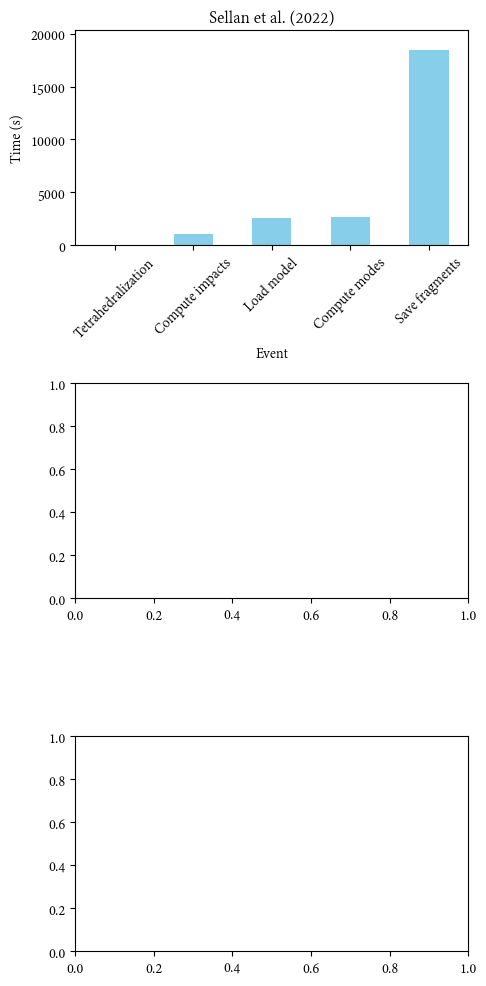

In [9]:
# Grid of size 3x1
fig, ax = plt.subplots(3, 1, figsize=(5, 10))

for i in range(len(approaches)):
    # how many events do exist for the approach
    unique_events = set([event.event_type for event in events[i]])
    
    accumulated_time = {event: 0 for event in unique_events}
    for event in events[i]:
        accumulated_time[event.event_type] += event.time
        
    # sort
    accumulated_time = dict(sorted(accumulated_time.items(), key=lambda item: item[1]))
    
    ax[i].bar(accumulated_time.keys(), accumulated_time.values(), width=0.5, color='skyblue')
    
    ax[i].set_title(approaches[i])
    ax[i].set_ylabel('Time (s)')
    ax[i].set_xlabel('Event')
    ax[i].set_xticklabels(accumulated_time.keys(), rotation=45)
    ax[i].set_xlim(-0.5, len(unique_events) - 0.5)
    ax[i].set_ylim(0, np.amax(list(accumulated_time.values())) * 1.1)
    
    break
    
plt.tight_layout()
plt.show()